In [3]:
import math

# Given values
num_couples = 5000000
p = 1/12000000

# Expected number of such couples (Poisson parameter)
lambda_val = num_couples * p

# Poisson approximations
P_A = 1 - math.exp(-lambda_val)
P_A_cap_B = 1 - math.exp(-lambda_val) - lambda_val * math.exp(-lambda_val)

# Conditional probability P(B|A)
P_B_given_A = P_A_cap_B / P_A

print(f"P(A): {P_A:.8f}")
print(f"P(A intersect B): {P_A_cap_B:.8f}")
print(f"P(B|A): {P_B_given_A:.8f}")


P(A): 0.34075937
P(A intersect B): 0.06607577
P(B|A): 0.19390743


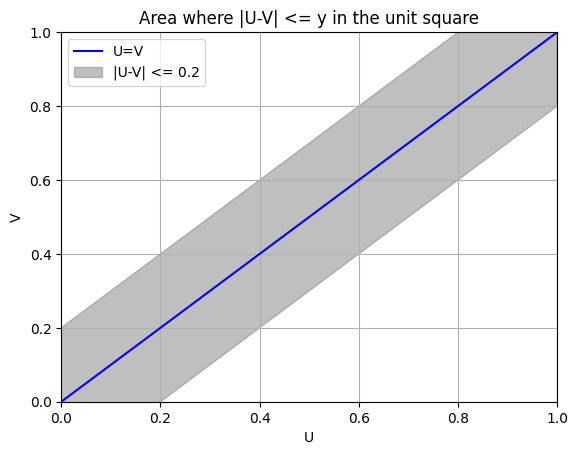

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure and axis
fig, ax = plt.subplots()

# Draw the line U=V in the unit square
u = np.linspace(0, 1, 100)
v = u
ax.plot(u, v, label="U=V", color="blue")

# Define y, which determines the width of the band around the line U=V
y = 0.2  # You can change this value to visualize different widths

# Draw the lines that represent the boundaries of the area where |U - V| <= y
ax.fill_between(u, v - y, v + y, color="gray", alpha=0.5, label=f"|U-V| <= {y}")

# Setting the limit for x and y axis
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Adding grid, legend, and labels
ax.grid(True)
ax.legend()
ax.set_xlabel("U")
ax.set_ylabel("V")
ax.set_title("Area where |U-V| <= y in the unit square")

# Show the plot
plt.show()


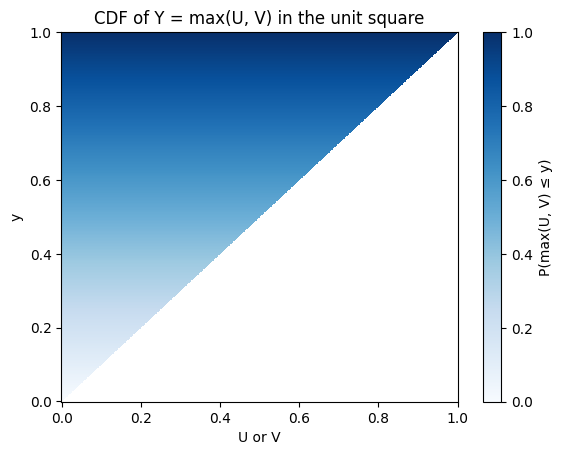

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables
u = np.linspace(0, 1, 500)  # Values from 0 to 1, representing possible values of U and V
y = np.linspace(0, 1, 500)  # Values from 0 to 1, representing possible values of Y

# Create the meshgrid for U, V, and Y. This is necessary for proper visualization in 2D space.
U, Y = np.meshgrid(u, y)

# Define the condition for the CDF (both U and V must be less than or equal to y)
condition = np.maximum(U, Y)  # Since we're plotting the maximum, we use np.maximum

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the CDF area
# We're interested in the area where U, V <= y, which is represented by the condition U <= Y & V <= Y
cdf_area = np.where(condition <= Y, condition, np.nan)  # Highlight only the relevant area for the CDF
c = ax.pcolormesh(U, Y, cdf_area, shading='auto', cmap='Blues', vmin=0, vmax=1)

# Add labels and title
ax.set_xlabel('U or V')
ax.set_ylabel('y')
ax.set_title('CDF of Y = max(U, V) in the unit square')

# Add a color bar to interpret the results
fig.colorbar(c, ax=ax, label='P(max(U, V) ≤ y)')

# Show the plot
plt.show()


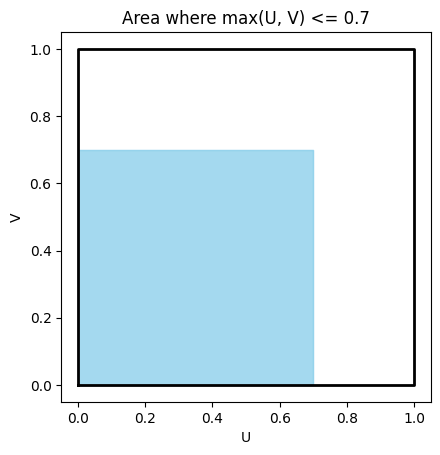

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of points in the square [0,1] x [0,1]
u = np.linspace(0, 1, 400)
v = np.linspace(0, 1, 400)
U, V = np.meshgrid(u, v)

# Create a mask representing the condition max(U, V) <= y for a given y (e.g., y = 0.7)
y = 0.7
condition = np.minimum(U, V) <= y

# Create a figure and a 3D subplot
fig, ax = plt.subplots()

# Plot the entire square [0,1] x [0,1]
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k-', linewidth=2)

# Add shading for the area where max(U, V) <= y
ax.fill_betweenx([0, y], 0, y, color='skyblue', alpha=0.5)
ax.fill_between([0, y], 0, y, color='skyblue', alpha=0.5)

# Add labels and title
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_title(f'Area where max(U, V) <= {y}')

# Set equal aspect ratio
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


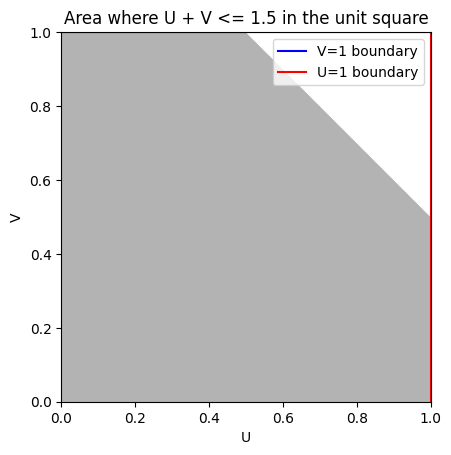

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure and axis.
fig, ax = plt.subplots()

# Set the range of U and V.
u = np.linspace(0, 1, 400)
v = np.linspace(0, 1, 400)

# Create a meshgrid for U and V.
U, V = np.meshgrid(u, v)

# Define y, you can choose any value in the range 1 < y <= 2.
y = 1.5  # Example value

# Calculate the condition U + V <= y.
condition = U + V <= y

# Plot the whole square [0, 1] x [0, 1].
ax.plot(u, np.ones_like(u), color='blue', label='V=1 boundary')
ax.plot(np.ones_like(v), v, color='red', label='U=1 boundary')

# Highlight the area meeting the condition.
plt.imshow(condition, 
           extent=(0, 1, 0, 1),  # [U_min, U_max, V_min, V_max]
           origin='lower', 
           cmap='Greys', 
           alpha=0.3)

# Customize the plot.
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_title(f'Area where U + V <= {y} in the unit square')

# Add a legend.
ax.legend()

# Show the plot.
plt.show()


In [15]:
n= 5000000
p = 1/12000000

pb = 1-(1-p)**n - n*p*(1-p)**(n-1)

ans = P_A_cap_B/pb
ans

1.0000001002174606

In [51]:
import numpy as np


A = np.array([[0,1/2,0,0], [1/3,0,0,1/2], [1/3,0,1,1/2], [1/3,1/2,0,0]])

# Raise the matrix to the power of 10
B = np.linalg.matrix_power(A, 100)

v = np.array([1/4,1/4,1/4,1/4])
n = len(v)
result = np.dot(B,v)

beta = 0.8
vec = np.array([1]*n)*((1-beta)/n)
#print(vec)

vprime = (beta*A) + vec
vprime

taxation = np.dot(np.linalg.matrix_power(vprime, 1),v)

taxation


array([0.15      , 0.21666667, 0.41666667, 0.21666667])

In [58]:
A = np.array([[1/3,1/2,0],[1/3,0,1/2],[1/3,1/2,1/2]])
v = np.array([1/3,1/3,1/3])
B = np.linalg.matrix_power(A,100)
result = np.dot(B,v)
print(A)

beta = 0.8
n = len(v)
vec = np.array([1]*n)*((1-beta)/n)
print(vec)

vprime = (beta*A)+ vec
print(vprime)
b_1 = np.dot(np.linalg.matrix_power(vprime,1),v)
b_1


[[0.33333333 0.5        0.        ]
 [0.33333333 0.         0.5       ]
 [0.33333333 0.5        0.5       ]]
[0.06666667 0.06666667 0.06666667]
[[0.33333333 0.46666667 0.06666667]
 [0.33333333 0.06666667 0.46666667]
 [0.33333333 0.46666667 0.46666667]]


array([0.28888889, 0.28888889, 0.42222222])

In [102]:
A = np.array([[0,1/2,1,0],[1/3,0,0,1/2],[1/3,0,0,1/2],[1/3,1/2,0,0]])
beta = 0.8
e = np.array([0,1,0,1])
n = 4
vec = np.array([1]*n)*((1-beta)/2*e)
v = np.array([1/4,1/4,1/4,1/4])

print(v)
print(vec)
#print(vec)
vprime = (beta*A)+vec
print(vprime)

b_1 = np.dot(np.linalg.matrix_power(vprime,0),v)
b_1


[0.25 0.25 0.25 0.25]
[0.  0.1 0.  0.1]
[[0.         0.5        0.8        0.1       ]
 [0.26666667 0.1        0.         0.5       ]
 [0.26666667 0.1        0.         0.5       ]
 [0.26666667 0.5        0.         0.1       ]]


array([0.25, 0.25, 0.25, 0.25])